In [2]:
import pandas as pd
import numpy as np

loc = "MERGED2016_17_PP.csv"

dfraw = pd.read_csv(loc)

C:\Users\Isaac\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dfraw.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_4_LOANNOPELL,C150_L4_LOANNOPELL,D150_L4_LOANNOPELL,C150_4_NOLOANNOPELL,D150_4_NOLOANNOPELL,C150_L4_NOLOANNOPELL,D150_L4_NOLOANNOPELL,GT_28K_P10,GT_28K_P8,GT_28K_P6
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,195.0,NaN,NaN,0.3258,89.0,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,229.0,NaN,NaN,0.5603,630.0,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,0.5000,2.0,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,135.0,NaN,NaN,0.5606,264.0,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,55.0,NaN,NaN,0.2277,101.0,NaN,NaN,NaN,NaN,NaN


In [4]:
dfraw.shape

(7175, 1847)

### There are a ridiculous number of columns here, so lets grab some interesting variables and put them in their own dataframe

In [5]:
df = dfraw[["C100_4", "NPT4_PUB"]]
df.columns = ["completion", "public_school_tuition"]

In [6]:
df.head()

,completion,public_school_tuition
0,0.0643,15567.0
1,0.3018,16475.0
2,0.1429,NaN
3,0.1533,19423.0
4,0.0725,15037.0


In [7]:
df.corr()

,completion,public_school_tuition
completion,1.000000,0.515731
public_school_tuition,0.515731,1.000000


### Joy suggested that INEXPFTE (instructional expenditures per full-time student) and ADM_RATE (admissions rate) are correlated with completion rates, so lets add those to the dataframe and run the correlation

In [8]:
df["expenditures_per_student"] = dfraw["INEXPFTE"]
df["adm_rate"] = dfraw["ADM_RATE"]

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### I suggest looking at pell_grant_rate, and loan_principal. The intuition is that if you qualify for pell you're from a disadvantaged background and less likely to graduate

In [9]:
df["pell_grant_rate"]=dfraw["PCTPELL"]

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.head()

,completion,public_school_tuition,expenditures_per_student,adm_rate,pell_grant_rate
0,0.0643,15567.0,5888.0,0.8738,0.7039
1,0.3018,16475.0,17055.0,0.5814,0.3525
2,0.1429,NaN,5417.0,NaN,0.6971
3,0.1533,19423.0,10558.0,0.7628,0.2949
4,0.0725,15037.0,7889.0,0.4590,0.7815


### Another place to look for impact on completion rates is the share of degree seeking students who are of a particular race or ethnicity

In [11]:
df["white"] = dfraw["UGDS_WHITE"]
df["black"] = dfraw["UGDS_BLACK"]
df["hispanic"] = dfraw["UGDS_HISP"]
df["asian"] = dfraw["UGDS_ASIAN"]
df["american_indian"] = dfraw["UGDS_AIAN"]
df["hawaiian_pcislander"] = dfraw["UGDS_NHPI"]
df["race_ethnicity_two"] =dfraw["UGDS_2MOR"]
df["nonresident"] = dfraw["UGDS_NRA"]
df["unknown"] = dfraw["UGDS_UNKN"]

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [12]:
df.corr()

,completion,public_school_tuition,expenditures_per_student,adm_rate,pell_grant_rate,white,black,hispanic,asian,american_indian,hawaiian_pcislander,race_ethnicity_two,nonresident,unknown
completion,1.000000,0.515731,0.459406,-0.306999,-0.569687,0.278313,-0.291535,-0.149864,0.263919,-0.042858,-0.072222,0.171952,0.176216,-0.166568
public_school_tuition,0.515731,1.000000,0.292337,0.062488,-0.072446,0.202425,0.003498,-0.235117,0.042371,-0.107501,-0.077829,0.018126,0.204074,-0.013419
expenditures_per_student,0.459406,0.292337,1.000000,-0.253013,-0.282385,0.105862,-0.120008,-0.128894,0.116228,0.019564,-0.018091,0.087839,0.221100,-0.012070
adm_rate,-0.306999,0.062488,-0.253013,1.000000,0.145925,0.143278,-0.048812,-0.008082,-0.201542,0.034859,0.033931,-0.069470,-0.182576,-0.022053
pell_grant_rate,-0.569687,-0.072446,-0.282385,0.145925,1.000000,-0.338549,0.355269,0.230680,-0.163218,0.008184,0.061994,-0.144701,-0.278088,-0.025942
white,0.278313,0.202425,0.105862,0.143278,-0.338549,1.000000,-0.487208,-0.565485,-0.225557,-0.096462,-0.104106,0.007263,-0.091099,-0.173129
black,-0.291535,0.003498,-0.120008,-0.048812,0.355269,-0.487208,1.000000,-0.208349,-0.126757,-0.092085,-0.039819,-0.106087,-0.121283,-0.032272
hispanic,-0.149864,-0.235117,-0.128894,-0.008082,0.230680,-0.565485,-0.208349,1.000000,0.013849,-0.062749,-0.017736,-0.099518,-0.064033,-0.091325
asian,0.263919,0.042371,0.116228,-0.201542,-0.163218,-0.225557,-0.126757,0.013849,1.000000,-0.053453,0.103119,0.095215,0.159135,-0.016698
american_indian,-0.042858,-0.107501,0.019564,0.034859,0.008184,-0.096462,-0.092085,-0.062749,-0.053453,1.000000,-0.004183,0.007327,-0.040509,-0.023594


### These results are promising so far, let's remove NaN observations and run a regression

In [13]:
df.dropna(inplace = True)
df.head()

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,completion,public_school_tuition,expenditures_per_student,adm_rate,pell_grant_rate,white,black,hispanic,asian,american_indian,hawaiian_pcislander,race_ethnicity_two,nonresident,unknown
0,0.0643,15567.0,5888.0,0.8738,0.7039,0.0256,0.9129,0.0076,0.0019,0.0024,0.0017,0.0401,0.0065,0.0013
1,0.3018,16475.0,17055.0,0.5814,0.3525,0.5786,0.2626,0.0309,0.0598,0.0028,0.0004,0.0387,0.0179,0.0083
3,0.1533,19423.0,10558.0,0.7628,0.2949,0.7148,0.1131,0.0411,0.0414,0.0120,0.0000,0.0181,0.0303,0.0292
4,0.0725,15037.0,7889.0,0.4590,0.7815,0.0138,0.9337,0.0111,0.0028,0.0013,0.0004,0.0111,0.0159,0.0100
5,0.4385,21676.0,10478.0,0.5259,0.1938,0.7841,0.1037,0.0437,0.0118,0.0036,0.0009,0.0297,0.0192,0.0033


### Next let's run a regression and see what the results are

In [14]:
import statsmodels.formula.api as sm

reg1 = sm.ols(formula='completion ~ public_school_tuition + expenditures_per_student + adm_rate + pell_grant_rate + white + black + hispanic + asian + american_indian + hawaiian_pcislander + race_ethnicity_two + nonresident + unknown', data=df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             completion   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     49.81
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           4.54e-83
Time:                        17:54:34   Log-Likelihood:                 401.28
No. Observations:                 543   AIC:                            -774.6
Df Residuals:                     529   BIC:                            -714.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.1136     56.780      0.055      0.956    -108.427     114.655
public_school_tuition     1.328e-05    1.5e-06      8.831      0.000    1.03e-05    1.62e-05
expenditures_per_student  1.121e-05   1.42e-06      7.901      0.000    8.42e-06     1.4e-05
adm_rate                    -0.1404      0.034     -4.124      0.000      -0.207      -0.074
pell_grant_rate             -0.3142      0.068     -4.599      0.000      -0.448      -0.180
white                       -2.8889     56.781     -0.051      0.959    -114.433     108.655
black                       -3.0002     56.783     -0.053      0.958    -114.548     108.548
hispanic                    -2.8637     56.782     -0.050      0.960    -114.409     108.682
asian                       -2.6588     56.787     -0.047      0.963    -114.214     108.897
american_indian             -3.2026     56.777     -0.056      0.955    -114.739     108.334
hawaiian_pcislander         -5.9131     56.823     -0.104      0.917    -117.540     105.714
race_ethnicity_two          -3.1044     56.779     -0.055      0.956    -114.645     108.436
nonresident                 -2.9100     56.776     -0.051      0.959    -114.444     108.624
unknown                     -2.9460     56.784     -0.052      0.959    -114.495     108.603
==============================================================================
Omnibus:                        7.250   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                9.793
Skew:                           0.103   Prob(JB):                      0.00747
Kurtosis:                       3.625   Cond. No.                     6.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Our race/ethnicity variables leave something to be desired, lets remove some of them and see if the significance increases

In [15]:
reg2 = sm.ols(formula='completion ~ public_school_tuition + expenditures_per_student + adm_rate + pell_grant_rate + white + black + hispanic + asian', data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             completion   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     78.44
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           3.99e-85
Time:                        17:54:34   Log-Likelihood:                 395.26
No. Observations:                 543   AIC:                            -772.5
Df Residuals:                     534   BIC:                            -733.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0138      0.082     -0.168      0.866      -0.175       0.147
public_school_tuition     1.344e-05    1.5e-06      8.934      0.000    1.05e-05    1.64e-05
expenditures_per_student  1.167e-05   1.41e-06      8.260      0.000    8.89e-06    1.44e-05
adm_rate                    -0.1529      0.034     -4.493      0.000      -0.220      -0.086
pell_grant_rate             -0.3355      0.068     -4.950      0.000      -0.469      -0.202
white                        0.2569      0.079      3.265      0.001       0.102       0.411
black                        0.1534      0.084      1.823      0.069      -0.012       0.319
hispanic                     0.2881      0.082      3.532      0.000       0.128       0.448
asian                        0.4472      0.131      3.409      0.001       0.189       0.705
==============================================================================
Omnibus:                        6.186   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                8.013
Skew:                           0.090   Prob(JB):                       0.0182
Kurtosis:                       3.567   Cond. No.                     6.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Narrowing down the specification in the race/ethnicity category seems to have improved the predictive capabilities of our model. Race/ethnicity factors are now signficant except for the black variable

### From the beginning we had a problem with our money-based variables. The coefficients are very small. So lets consider them in an either thousands of dollars specifcation or a log specification

In [16]:
df["log_public_school_tuition"] = np.log(df['public_school_tuition'])
df["public_school_tuition_thousands"] = df["public_school_tuition"]/1000
df["log_expenditures_per_student"] = np.log(df['expenditures_per_student'])
df["expenditures_per_student_thousands"] = df["expenditures_per_student"]/1000

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [17]:
df.head()

,completion,public_school_tuition,expenditures_per_student,adm_rate,pell_grant_rate,white,black,hispanic,asian,american_indian,hawaiian_pcislander,race_ethnicity_two,nonresident,unknown,log_public_school_tuition,public_school_tuition_thousands,log_expenditures_per_student,expenditures_per_student_thousands
0,0.0643,15567.0,5888.0,0.8738,0.7039,0.0256,0.9129,0.0076,0.0019,0.0024,0.0017,0.0401,0.0065,0.0013,9.652909,15.567,8.680672,5.888
1,0.3018,16475.0,17055.0,0.5814,0.3525,0.5786,0.2626,0.0309,0.0598,0.0028,0.0004,0.0387,0.0179,0.0083,9.709599,16.475,9.744199,17.055
3,0.1533,19423.0,10558.0,0.7628,0.2949,0.7148,0.1131,0.0411,0.0414,0.0120,0.0000,0.0181,0.0303,0.0292,9.874213,19.423,9.264639,10.558
4,0.0725,15037.0,7889.0,0.4590,0.7815,0.0138,0.9337,0.0111,0.0028,0.0013,0.0004,0.0111,0.0159,0.0100,9.618269,15.037,8.973225,7.889
5,0.4385,21676.0,10478.0,0.5259,0.1938,0.7841,0.1037,0.0437,0.0118,0.0036,0.0009,0.0297,0.0192,0.0033,9.983961,21.676,9.257033,10.478


### Let's run the model with log specifications. The interpretation is that for each percent increase in costs/tuition, the completion rate should be effected by some percentage of 100.

In [18]:
reg3 = sm.ols(formula='completion ~ log_public_school_tuition + log_expenditures_per_student + adm_rate + pell_grant_rate + white + black + hispanic + asian', data=df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             completion   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     68.11
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           1.19e-76
Time:                        17:54:34   Log-Likelihood:                 375.21
No. Observations:                 543   AIC:                            -732.4
Df Residuals:                     534   BIC:                            -693.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.0631      0.234     -8.817      0.000      -2.523      -1.603
log_public_school_tuition        0.1191      0.019      6.123      0.000       0.081       0.157
log_expenditures_per_student     0.1309      0.016      8.108      0.000       0.099       0.163
adm_rate                        -0.1532      0.035     -4.364      0.000      -0.222      -0.084
pell_grant_rate                 -0.3880      0.070     -5.538      0.000      -0.526      -0.250
white                            0.3061      0.081      3.764      0.000       0.146       0.466
black                            0.2096      0.087      2.416      0.016       0.039       0.380
hispanic                         0.3615      0.085      4.278      0.000       0.195       0.528
asian                            0.5256      0.135      3.880      0.000       0.260       0.792
==============================================================================
Omnibus:                       18.232   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.367
Skew:                           0.250   Prob(JB):                     4.20e-07
Kurtosis:                       4.024   Cond. No.                         613.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The log spec dropped the r^2, but had easily interperable coefficients

### Let's try the thousands spec

In [19]:
import statsmodels.formula.api as sm

reg4 = sm.ols(formula='completion ~ public_school_tuition_thousands + expenditures_per_student_thousands + adm_rate + pell_grant_rate + white + black + hispanic + asian', data=df).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             completion   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     78.44
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           3.99e-85
Time:                        17:54:34   Log-Likelihood:                 395.26
No. Observations:                 543   AIC:                            -772.5
Df Residuals:                     534   BIC:                            -733.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.0138      0.082     -0.168      0.866      -0.175       0.147
public_school_tuition_thousands        0.0134      0.002      8.934      0.000       0.010       0.016
expenditures_per_student_thousands     0.0117      0.001      8.260      0.000       0.009       0.014
adm_rate                              -0.1529      0.034     -4.493      0.000      -0.220      -0.086
pell_grant_rate                       -0.3355      0.068     -4.950      0.000      -0.469      -0.202
white                                  0.2569      0.079      3.265      0.001       0.102       0.411
black                                  0.1534      0.084      1.823      0.069      -0.012       0.319
hispanic                               0.2881      0.082      3.532      0.000       0.128       0.448
asian                                  0.4472      0.131      3.409      0.001       0.189       0.705
==============================================================================
Omnibus:                        6.186   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                8.013
Skew:                           0.090   Prob(JB):                       0.0182
Kurtosis:                       3.567   Cond. No.                         663.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Here the r^2 remained higher. So it probably makes more sense to keep the thousands specification. Here the coefficients are much more interperable than before. For every thousand dollars more the school charges in tuition, the likelihood of degree completion increases by 1.21%. The same can be said of the impact of an extra thousand dollars in expenditures.

### Next lets see whether the r^2 improves without an intercept

In [20]:
reg5 = sm.ols(formula='completion ~ public_school_tuition_thousands + expenditures_per_student_thousands + adm_rate + pell_grant_rate + white + black + hispanic + asian - 1', data=df).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             completion   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     476.7
Date:                Thu, 25 Oct 2018   Prob (F-statistic):          8.18e-238
Time:                        17:54:34   Log-Likelihood:                 395.24
No. Observations:                 543   AIC:                            -774.5
Df Residuals:                     535   BIC:                            -740.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
public_school_tuition_thousands        0.0134      0.001      9.024      0.000       0.010       0.016
expenditures_per_student_thousands     0.0116      0.001      8.647      0.000       0.009       0.014
adm_rate                              -0.1548      0.032     -4.838      0.000      -0.218      -0.092
pell_grant_rate                       -0.3386      0.065     -5.198      0.000      -0.467      -0.211
white                                  0.2456      0.042      5.895      0.000       0.164       0.327
black                                  0.1434      0.059      2.413      0.016       0.027       0.260
hispanic                               0.2778      0.054      5.172      0.000       0.172       0.383
asian                                  0.4324      0.097      4.449      0.000       0.241       0.623
==============================================================================
Omnibus:                        6.131   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                7.940
Skew:                           0.089   Prob(JB):                       0.0189
Kurtosis:                       3.565   Cond. No.                         411.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### So far our model has eight independent variables. The r^2 is high and this is a predictive model we can leave it for now. Our next step can be testing the model specification with a split test. To do this we first need to employ a regression method that is amenable to a split test. Let's load some libraries

In [21]:
%matplotlib inline

import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [22]:
from sklearn.linear_model import LinearRegression
X = df.drop(['completion', "public_school_tuition", "expenditures_per_student", "log_public_school_tuition", "log_expenditures_per_student", "american_indian", "hawaiian_pcislander" ,"race_ethnicity_two", "nonresident", "unknown"], axis = 1)

lm = LinearRegression(fit_intercept=False)
lm

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [23]:
lm.fit(X, df.completion)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

### Let's check some coefficients to be sure they match with our previous model

In [24]:
reg5.params

public_school_tuition_thousands       0.013397
expenditures_per_student_thousands    0.011595
adm_rate                             -0.154828
pell_grant_rate                      -0.338602
white                                 0.245630
black                                 0.143413
hispanic                              0.277766
asian                                 0.432387
dtype: float64

In [25]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ["features", 'estimated coefficients'])

,features,estimated coefficients
0,adm_rate,-0.154828
1,pell_grant_rate,-0.338602
2,white,0.245630
3,black,0.143413
4,hispanic,0.277766
5,asian,0.432387
6,public_school_tuition_thousands,0.013397
7,expenditures_per_student_thousands,0.011595


### Great our models match, that's a good start, let's split test

In [26]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df.completion, test_size=.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(363, 8)
(180, 8)
(363,)
(180,)


In [27]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [28]:
print('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 0.013330520311307112
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.014466214287958


### The mean of the squared errors is very small which I take to be a positive.

# Initial Results

### Our initial model contained the following coefficients which suggest the following predicted relationships in a limited sense.

In [29]:
reg5.params

public_school_tuition_thousands       0.013397
expenditures_per_student_thousands    0.011595
adm_rate                             -0.154828
pell_grant_rate                      -0.338602
white                                 0.245630
black                                 0.143413
hispanic                              0.277766
asian                                 0.432387
dtype: float64

### These results have limited scope in application, but we can say that based on our model each of these variables have a predicted effect on completion rates. 

#### The tuition paid at public school as well as expenses paid for public school education predict a higher completion rate. Why is that? It could be that costlier schools select against students who are poor. If you believe that poor people are also less likely to complete a four year degree this could be one explanation. Tuition and expenditures are essentially stand-ins for finding out if schools have a lot of wealthier students on average.

#### The admission rate at public schools predict lower completion rates. A novel theory proposed by AJ Henley is that the top tiers of colleges make it difficult for students who are admitted into the school to fail. This could be true. We are looking primarily at public schools however whose guidelines for graduation are typically monitored by state/regional accreditation agreements, so the degree to which this is true warrants further study. Another possibility is that, as a school loosens its standards for admissions and allows less qualified applicants to attend the school, completion rates drop because the cohort served by low admissions standards is less motivated than the cohort served by higher admissions standards. Yet another possibility is that the schools that have the highest admissions rates are in a process of expanding their campuses and the expansion results in decreased quality of education leading to lower completion rates

#### Pell grant rates perhaps unsurprisingly predict lower completion rates more than any other variable. Because students who apply for pell grants have to come from a financially distressed situation it is unsurprising that their lack of resources is associated with much lower graduation rates.

#### Race/Ethnicity admissions variables are all positive predictors of completion rates. So while having a large number of newly admitted students of any particular race won't predict lower graduation rates interpreting these results should be done with care. The coefficients on each race/ethnicity coefficient represent an increase in completion rate above a hypothetical school that has an admission rate of some other race that is not white, black, hispanic, or asian. In other words there is another category called "other minority" in our regression, and in the hypothetical school that has 100% students from a background other than the backgrounds listed above the completion rate is lower than a school that has 100% white students, 100%, black students, 100% hispanic students, or 100% asian students. And in our hypothetical other minority category completion rates were lower relative to the other race/ethinicity categories on average.

#### The way to interpret the race/ethnicity coefficients is to multiply the % of admissions of a givent race/ethnicity for a school times the coefficient on the given race/ethnicity to find some amount by which the rate of completion of a four year degree increases. The best way to think about this coefficient is as an elasticity. For example 1% increase in the admissions rate of black students increases the completion rate by .01 * .14 = .0014. 

#### Takeaways from the race/ethnicity coefficients could be said to be that schools with higher rates of admission of asian students will likely have higher rates of completion. However it is unclear in which direction causality runs. Do completion rates go up because asian students are better students? (Race/ethnicity causes higher completion rates) Do schools with high completion rates seem more attractive to asian students? (Completion rates cause more asian students to apply) Or is something else happening altogether? (asian students are very good study mates and their positive influence causes more students to graduate) The true relationship is beyond the scope of the data provided

# K-means analysis of race/ethnicity admissions by completion rate for public schools

### For the preliminary analysis we will be using three sets of clusters, but we may decide to use more clusters later

In [30]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

## We can start by plotting completion rates and black student admission rates

Text(0,0.5,'completion')

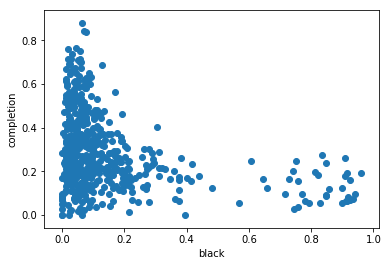

In [31]:
plt.scatter(df['black'],df['completion'])
plt.xlabel('black')
plt.ylabel('completion')

### Just from looking at this we can get some idea of how to group this cohort, but lets see how the kmeans algorithm groups each observation

In [32]:
from sklearn.cluster import KMeans
blckcomp = KMeans(n_clusters = 3)
blckcomp.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Now that we have our observations labeled by group, lets plot them by group

Text(0,0.5,'completion')

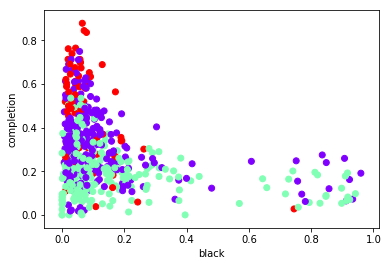

In [33]:
plt.scatter(df["black"], df['completion'], c=blckcomp.labels_ , cmap = "rainbow")
#plt.scatter(blckcomp.cluster_centers_[:,0], blckcomp.cluster_centers_[:,1], c='black')
plt.xlabel('black')
plt.ylabel('completion')

### Not helpful to say the least. Perhaps we need more centroids

Text(0,0.5,'completion')

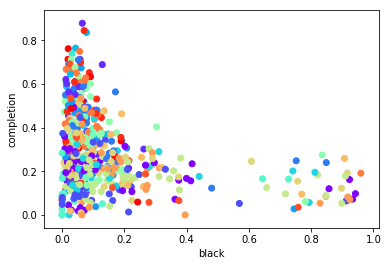

In [34]:
blckcomp = KMeans(n_clusters = 20)
blckcomp.fit(df)
plt.scatter(df["black"], df['completion'], c=blckcomp.labels_ , cmap = "rainbow")
plt.xlabel('black')
plt.ylabel('completion')

In [35]:
blckcomp.labels_

array([ 0,  1, 10,  0, 16,  0, 16, 14,  0, 10, 12, 13, 12,  6, 19, 17,  6,
        3,  0, 15, 13,  2, 15, 15,  0, 12, 15, 10,  8,  2,  2, 12,  0,  8,
        8,  2, 12, 12,  8,  2,  2, 19,  5, 19,  7,  4,  5,  3, 10,  1, 13,
        0,  0,  0, 14, 13,  5,  0, 18, 11, 10, 14, 14, 15, 10, 15, 13,  3,
        5,  3,  3,  3,  3,  1,  0, 13, 12,  0, 13,  4, 13,  6, 12,  2, 12,
       14, 12, 12, 12, 15,  6, 15, 14, 14,  0, 13, 15, 15,  0,  0,  4, 19,
        6,  0, 13, 12,  4,  4,  5, 18, 16, 14,  4,  6,  1,  3,  3,  3, 12,
        4, 12, 12,  2, 12,  4,  2, 12,  2, 12,  2, 13,  4, 13,  0, 15,  1,
        3, 15, 14, 12,  2,  3,  1, 12, 12,  2, 12, 14,  2, 13,  2,  2, 15,
       12, 12,  2, 15, 12, 15, 15, 12, 13, 15, 13, 16, 12, 13,  3,  0,  6,
       14, 10,  1, 13, 14, 14, 18, 14, 14, 13, 14, 10, 18,  4, 18, 10,  3,
       14,  3, 14, 14, 13, 13, 13, 14, 12,  5,  1, 13,  6, 13, 12, 12,  0,
        6,  3,  0,  0,  0,  1,  0, 14,  6,  0,  0,  0, 14,  0, 12, 13,  4,
       12, 12,  0, 12,  0

### Perhaps its time to try a different race/ethnicity?

Text(0,0.5,'completion')

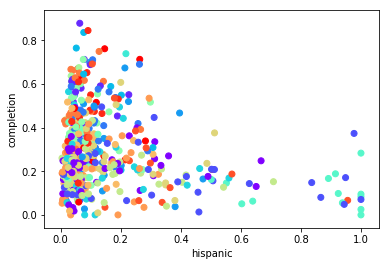

In [36]:
hispcomp = KMeans(n_clusters = 20)
hispcomp.fit(df)
plt.scatter(df["hispanic"], df['completion'], c=blckcomp.labels_ , cmap = "rainbow")
plt.xlabel('hispanic')
plt.ylabel('completion')

### Not a lot of luck here. My interpretation is that because the differences between observations are perhaps being rounded when the kmeans algorithm is grouping them the results are turning into garbage

## Joy's K-Means Clustering 
completion (dependent) 

Independent Variables - 

public_school_tuition_thousands
expenditures_per_student_thousands
adm_rate
pell_grant_rate

## To simplfy the dataframe, I'm going to create a new dataframe with just the variables I need for the K Means and bring in the necessary library 

In [37]:
km = df[['completion','public_school_tuition_thousands','expenditures_per_student_thousands','adm_rate','pell_grant_rate']]
km.head()

,completion,public_school_tuition_thousands,expenditures_per_student_thousands,adm_rate,pell_grant_rate
0,0.0643,15.567,5.888,0.8738,0.7039
1,0.3018,16.475,17.055,0.5814,0.3525
3,0.1533,19.423,10.558,0.7628,0.2949
4,0.0725,15.037,7.889,0.4590,0.7815
5,0.4385,21.676,10.478,0.5259,0.1938


In [38]:
from sklearn.cluster import KMeans

## For the first iteration of clustering, I am selecting 4 clusters - this is an arbitrary number to begin with... 

In [39]:
kmeans = KMeans(n_clusters = 4, random_state=1)
kmeans.fit(km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [40]:
print(kmeans.cluster_centers_)

[[ 0.39951778 19.20244444 10.4503037   0.70827778  0.30813852]
 [ 0.23321806 14.16970833  7.72230093  0.73624213  0.39482824]
 [ 0.18073308  8.78290977  7.96830075  0.65850226  0.45938045]
 [ 0.44874576 14.86425424 18.55532203  0.59525085  0.30260169]]


## I'm creating a new column in my original dataframe (km) that includes the cluster assignments the were derived from the KMeans process. Now that we have the clusters in our dataset, we can look at the data by clusters to determine characteristics. 

In [41]:
km['clusters'] = kmeans.labels_
km.head()

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,completion,public_school_tuition_thousands,expenditures_per_student_thousands,adm_rate,pell_grant_rate,clusters
0,0.0643,15.567,5.888,0.8738,0.7039,1
1,0.3018,16.475,17.055,0.5814,0.3525,3
3,0.1533,19.423,10.558,0.7628,0.2949,0
4,0.0725,15.037,7.889,0.4590,0.7815,1
5,0.4385,21.676,10.478,0.5259,0.1938,0


## I'm going to run a series of pivot tables to see how our data has been grouped. 

In [42]:
print(pd.pivot_table(km, index = 'clusters', values = 'completion'))
print(pd.pivot_table(km, index='clusters', values = 'public_school_tuition_thousands'))
print(pd.pivot_table(km, index='clusters', values = 'expenditures_per_student_thousands'))
print(pd.pivot_table(km, index='clusters', values = 'adm_rate'))
print(pd.pivot_table(km, index='clusters', values = 'pell_grant_rate'))

          completion
clusters            
0           0.399518
1           0.233218
2           0.180733
3           0.448746
          public_school_tuition_thousands
clusters                                 
0                               19.202444
1                               14.169708
2                                8.782910
3                               14.864254
          expenditures_per_student_thousands
clusters                                    
0                                  10.450304
1                                   7.722301
2                                   7.968301
3                                  18.555322
          adm_rate
clusters          
0         0.708278
1         0.736242
2         0.658502
3         0.595251
          pell_grant_rate
clusters                 
0                0.308139
1                0.394828
2                0.459380
3                0.302602


Text(0,0.5,'Mean')

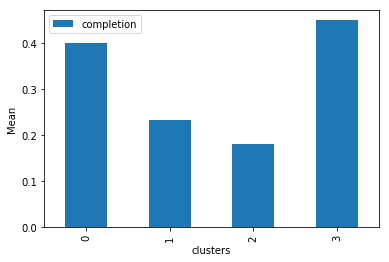

In [43]:
pd.pivot_table(km, index = 'clusters', values = 'completion').plot(kind = 'bar')
plt.ylabel("Mean")

The above graph shows the average completion rate for each of our generated clusters. Schools in cluster 1 & 3 have the highest completion rates; schools in cluster 0 have the lowest. 

Text(0,0.5,'Mean')

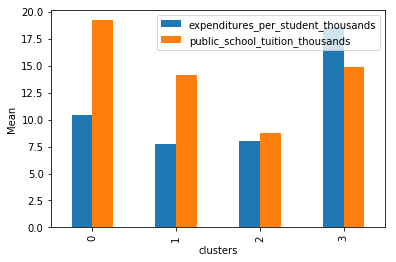

In [44]:
pd.pivot_table(km, index = 'clusters', values = ['public_school_tuition_thousands','expenditures_per_student_thousands']).plot(kind = 'bar')
plt.ylabel("Mean")

## The above graph shows the average expentitures and tuition by cluster. Schools in cluster 3 spend the most money per full-time student, schools in cluster 2 spend the least. Schools in cluster 1 have the highest tuition. 

Text(0,0.5,'Mean')

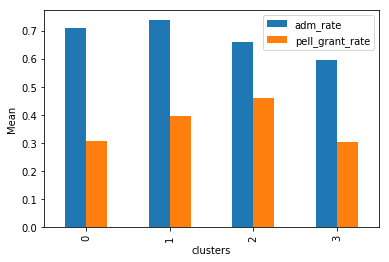

In [45]:
pd.pivot_table(km, index = 'clusters', values = ['adm_rate','pell_grant_rate']).plot(kind = 'bar')
plt.ylabel("Mean")

The above graph shows the average admissions rate and Pell grant rate by cluster. Schools in cluster 2 have the highest admission rates; schools in cluster 3 have the lowest. Schools in cluster 0 and in cluster 1 have similar admission rates. 

Schools in cluster 0 have the highest rate of Pell Grant students, and schools in cluster 1 have the lowest. Schools in cluster 2 and cluster 3 have similar rates of Pell Grant students. 

## Cluster Characteristics
**Cluster 0 Schools: Low completion rate; low expenditures per student; lowest tuition; moderate tuition rate; highest rate of Pell Grant students 

**Cluster 1 Schools: high completion rate; highest tuition; moderate expenditures per student; moderate admission rate; lowest rate of Pell Grant students

**Cluster 2 Schools: low completion rate; lowest expenditures per student; moderate tuition; highest admissions rate; second highest rate of Pell Grant students 

**Cluster 3 Schools: highest completion rate; highest expenditures per student; moderate tuition; lowest admissions rate; moderate rate of Pell Grant students 

All clusters are fairly distinct, but it's worth trying with 5 clusters to see if we can further identify unique groups. 

In [46]:
kmeans2 = KMeans(n_clusters = 5)
kmeans2.fit(km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
print(kmeans2.cluster_centers_)

[[ 1.74100000e-01  8.66352000e+00  7.65788800e+00  6.57648800e-01
   4.65937600e-01  2.00000000e+00]
 [ 4.00087692e-01  1.93333231e+01  1.03478846e+01  7.11139231e-01
   3.06363846e-01 -1.55431223e-15]
 [ 2.34689815e-01  1.41622500e+01  7.70987963e+00  7.35931481e-01
   3.96301852e-01  1.00925926e+00]
 [ 5.93166667e-01  1.49245556e+01  2.85786667e+01  4.21911111e-01
   2.98266667e-01  3.00000000e+00]
 [ 3.97112698e-01  1.44200952e+01  1.60056032e+01  6.33869841e-01
   3.09168254e-01  2.60317460e+00]]


In [48]:
km['clusters2'] = kmeans2.labels_
km.head()

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,completion,public_school_tuition_thousands,expenditures_per_student_thousands,adm_rate,pell_grant_rate,clusters,clusters2
0,0.0643,15.567,5.888,0.8738,0.7039,1,2
1,0.3018,16.475,17.055,0.5814,0.3525,3,4
3,0.1533,19.423,10.558,0.7628,0.2949,0,1
4,0.0725,15.037,7.889,0.4590,0.7815,1,2
5,0.4385,21.676,10.478,0.5259,0.1938,0,1


In [49]:
print(pd.pivot_table(km, index='clusters2', values = 'completion'))
print(pd.pivot_table(km, index='clusters2', values = 'public_school_tuition_thousands'))
print(pd.pivot_table(km, index='clusters2', values = 'expenditures_per_student_thousands'))
print(pd.pivot_table(km, index='clusters2', values = 'adm_rate'))
print(pd.pivot_table(km, index='clusters2', values = 'pell_grant_rate'))

           completion
clusters2            
0            0.174100
1            0.400088
2            0.234690
3            0.593167
4            0.397113
           public_school_tuition_thousands
clusters2                                 
0                                 8.663520
1                                19.333323
2                                14.162250
3                                14.924556
4                                14.420095
           expenditures_per_student_thousands
clusters2                                    
0                                    7.657888
1                                   10.347885
2                                    7.709880
3                                   28.578667
4                                   16.005603
           adm_rate
clusters2          
0          0.657649
1          0.711139
2          0.735931
3          0.421911
4          0.633870
           pell_grant_rate
clusters2                 
0                 0.465938
1 

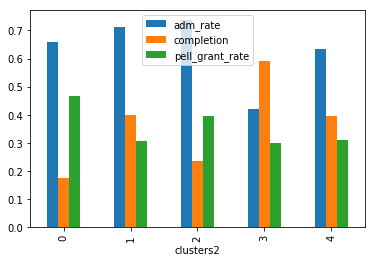

In [50]:
pd.pivot_table(km, index = 'clusters2', values = ['completion','adm_rate','pell_grant_rate']).plot(kind='bar')

## Across 3 of our target variables, schools in cluster 1 and in cluster 2 look very similar. I think we can stick with 4 clusters to show unique grouping. 

# Kim's Pivot Table Analysis

In [51]:
dfpivot = dfraw[["REGION", "PREDDEG", "C100_4", "NPT4_PUB"]]
dfpivot.columns = ["Region", "Predominate_Degrees", "Complete", "Tuition"]

dfpivot.head()

,Region,Predominate_Degrees,Complete,Tuition
0,5,3,0.0643,15567.0
1,5,3,0.3018,16475.0
2,5,3,0.1429,NaN
3,5,3,0.1533,19423.0
4,5,3,0.0725,15037.0


In [52]:
dfpivot2 = dfpivot[dfpivot["Predominate_Degrees"] != 0]
dfpivot2.head()

,Region,Predominate_Degrees,Complete,Tuition
0,5,3,0.0643,15567.0
1,5,3,0.3018,16475.0
2,5,3,0.1429,NaN
3,5,3,0.1533,19423.0
4,5,3,0.0725,15037.0


In [53]:
dfpivot2.dropna(inplace=True)

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### The predominant degree type awarded by the institution coded by the following

Predominant undergraduate degree awarded

 0 Not classified
 
 1 Predominantly certificate-degree granting
 
 2 Predominantly associate's-degree granting
 
 3 Predominantly bachelor's-degree granting
 
 4 Entirely graduate-degree granting

In [54]:
dfpivot2['Region'].replace({0: 'U.S. Service Schools', 1 :'New England', 2: 'Mid East', 3: 'Great Lakes', 4: 'Plains', 5: 'Southeast', 6: 'Southwest', 7: 'Rocky Mountains', 8: 'Far West', 9: 'Outlying ares'},inplace=True)
dfpivot2['Predominate_Degrees'].replace({1 : 'certificate-degree', 2: 'associate', 3: 'bachelor-degree', 4: 'Graduate degree'},inplace=True)
dfpivot2.head()

C:\Users\Isaac\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Region,Predominate_Degrees,Complete,Tuition
0,Southeast,bachelor-degree,0.0643,15567.0
1,Southeast,bachelor-degree,0.3018,16475.0
3,Southeast,bachelor-degree,0.1533,19423.0
4,Southeast,bachelor-degree,0.0725,15037.0
5,Southeast,bachelor-degree,0.4385,21676.0


In [55]:
pd.pivot_table(dfpivot2, index=['Region','Predominate_Degrees'],
aggfunc='mean',
values=['Region', 'Predominate_Degrees','Complete','Tuition'])

Complete       Tuition
Region               Predominate_Degrees                        
Far West             associate            0.571400   3005.000000
                     bachelor-degree      0.288833  12427.054545
                     certificate-degree   0.057850   9237.000000
Great Lakes          associate            0.098950  10718.125000
                     bachelor-degree      0.254331  14584.485714
Mid East             associate            0.273600  16758.375000
                     bachelor-degree      0.348667  16421.102041
New England          associate            0.337700  19630.000000
                     bachelor-degree      0.354372  16198.975000
Outlying ares        associate            0.040200   5074.500000
                     bachelor-degree      0.108921   5491.857143
Plains               associate            0.058800   1152.000000
                     bachelor-degree      0.244445  14392.811321
Rocky Mountains      associate            0.093300  13501.000000
                     bachelor-degree      0.217614  14884.285714
Southeast            associate            0.079450  10372.750000
                     bachelor-degree      0.273003  13648.531034
                     certificate-degree   0.123200  10154.000000
Southwest            associate            0.273950   6847.500000
                     bachelor-degree      0.218842  11773.491525
U.S. Service Schools bachelor-degree      0.692100   6866.000000

# Rerunning the predictive model for private school

Now that we know which variables we want to look at, we can try to make predictive models for the other school types fairly quickly and easily

### First lets clean up the data in the raw data set before we pull it into the dataframe we want to use for the analysis

In [67]:
dfraw["completion"] = dfraw["C100_4"]
dfraw["adm_rate"] = dfraw["ADM_RATE"]
dfraw["pell"] = dfraw["PCTPELL"]

In [68]:
dfraw["private_tuition_thou"] = dfraw["NPT4_PRIV"]/1000
dfraw["private_expense_thou"] = dfraw["INEXPFTE"]/1000

In [69]:
dfraw["white"] = dfraw["UGDS_WHITE"]
dfraw["black"] = dfraw["UGDS_BLACK"]
dfraw["hispanic"] = dfraw["UGDS_HISP"]
dfraw["asian"] = dfraw["UGDS_ASIAN"]

In [70]:
dfpriv = dfraw[["completion", "adm_rate", "pell" ,"private_tuition_thou", "private_expense_thou", "white", "black", "hispanic", "asian"]]

In [116]:
dfpriv.head()

,completion,adm_rate,pell,private_tuition_thou,private_expense_thou,white,black,hispanic,asian
10,0.6196,0.000484,0.1888,23.227,9.510,0.7921,0.1171,0.0217,0.0489
12,0.0056,0.000236,0.8255,23.002,9.350,0.0441,0.9265,0.0029,0.0000
16,0.1810,0.000454,0.4727,18.298,5.121,0.4101,0.5037,0.0222,0.0044
22,0.0000,0.000975,0.5250,21.154,4.934,0.3430,0.5156,0.0125,0.0021
23,0.2620,0.000568,0.4425,20.359,6.474,0.6421,0.2114,0.0395,0.0035


In [103]:
dfpriv.dropna(inplace = True)

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
reg6 = sm.ols(formula='completion ~ private_tuition_thou + private_expense_thou + adm_rate + pell + white + black + hispanic + asian - 1', data=dfpriv).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             completion   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1262.
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:47:19   Log-Likelihood:                 514.92
No. Observations:                1118   AIC:                            -1014.
Df Residuals:                    1110   BIC:                            -973.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
private_tuition_thou     0.0095      0.001     14.122      0.000       0.008       0.011
private_expense_thou     0.0037      0.001      7.092      0.000       0.003       0.005
adm_rate              -151.7199     24.086     -6.299      0.000    -198.980    -104.460
pell                    -0.5084      0.037    -13.632      0.000      -0.582      -0.435
white                    0.5316      0.029     18.240      0.000       0.474       0.589
black                    0.4027      0.046      8.672      0.000       0.312       0.494
hispanic                 0.5425      0.043     12.513      0.000       0.457       0.628
asian                    0.8230      0.122      6.729      0.000       0.583       1.063
==============================================================================
Omnibus:                       64.382   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.234
Skew:                          -0.377   Prob(JB):                     5.25e-29
Kurtosis:                       4.492   Cond. No.                     1.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
reg5.params

public_school_tuition_thousands       0.013397
expenditures_per_student_thousands    0.011595
adm_rate                             -0.154828
pell_grant_rate                      -0.338602
white                                 0.245630
black                                 0.143413
hispanic                              0.277766
asian                                 0.432387
dtype: float64

In [106]:
reg6.params

private_tuition_thou      0.009527
private_expense_thou      0.003678
adm_rate               -151.719857
pell                     -0.508379
white                     0.531646
black                     0.402745
hispanic                  0.542508
asian                     0.822983
dtype: float64

In [118]:
reg6.params[2] * .001

-0.1517198568970062

# This result gives us a model that predicts private school completion rates with a reasonably high r^2

### Interpreting the coefficients

The coefficient on tuition and expense appear to be functioning similarly to how they did in the previous model. However they are smaller. This indicates that at private school, your family's background has a smaller impact on whether or not you complete your degree.

The coefficient on admission rate is huge. A .001 or .1% increase in admission rate predicts a decreased chance of completion by .001 * 151.719 = 15.17 or 15.17%. We can look at this as a proxy for exclusivity. The more exclusive the school is (lower admissions) the more likely you are to graduate. The less exclusive the school is (higher admissions) the less likely you are to graduate.

The coefficient on pell is functioning similar to how it was before by predicting lower completion rates for those who receive pell grants. However at a private school students receiving pell appear to have an even worse time of it.

The same relativistic arguemnt made about race/ethnicity and graduation rates can be made here again.